In [51]:
### import libraries and packages
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt
import plotly,plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

##Data processing fns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.utils import resample


##classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## Model evaluation tools
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score


In [52]:
## Load the dataset
data=pd.read_csv("loan_prediction.csv")

In [53]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
data.shape

(614, 13)

In [55]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [57]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


### Study->Categorical attributes

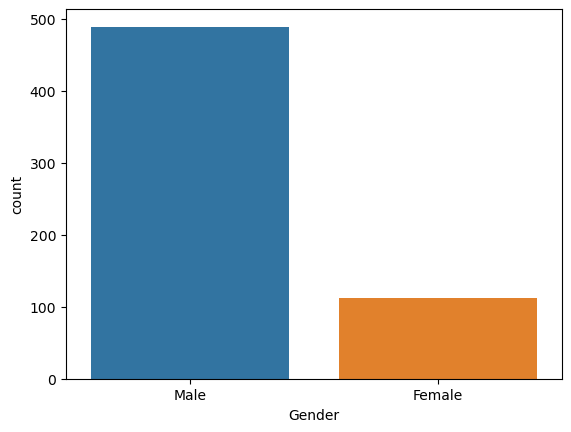

In [59]:
sns.countplot(x="Gender", data=data)
plt.show()

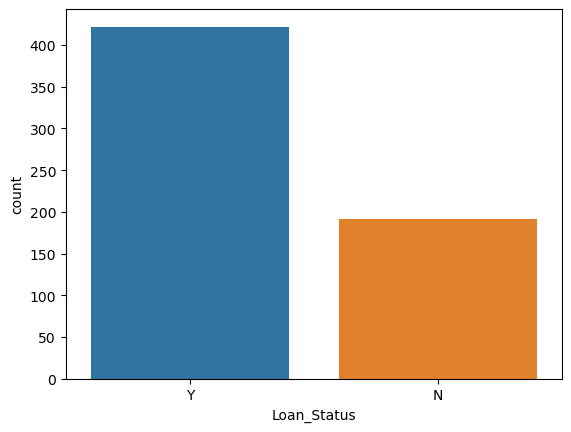

In [60]:
sns.countplot(x="Loan_Status", data=data)
plt.show()

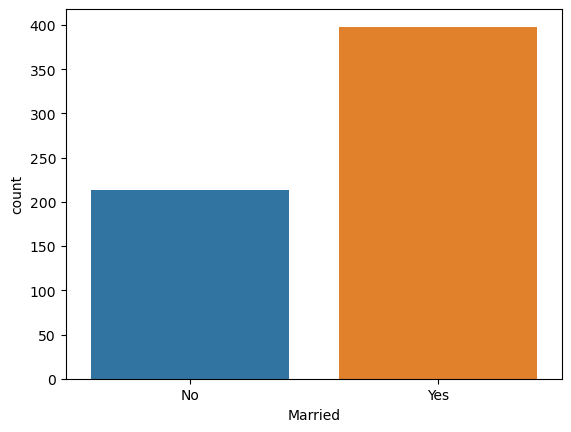

In [61]:
sns.countplot(x="Married", data=data)
plt.show()

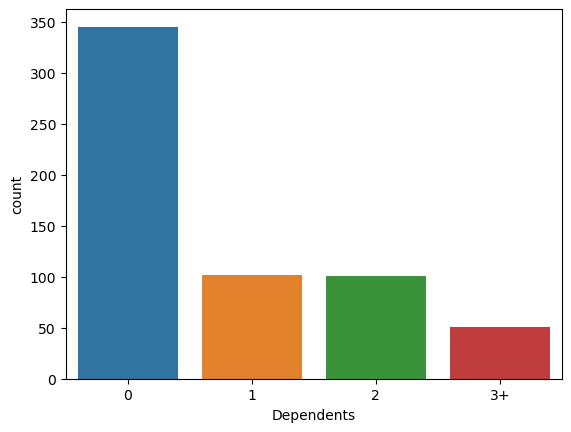

In [62]:
sns.countplot(x="Dependents", data=data)
plt.show()

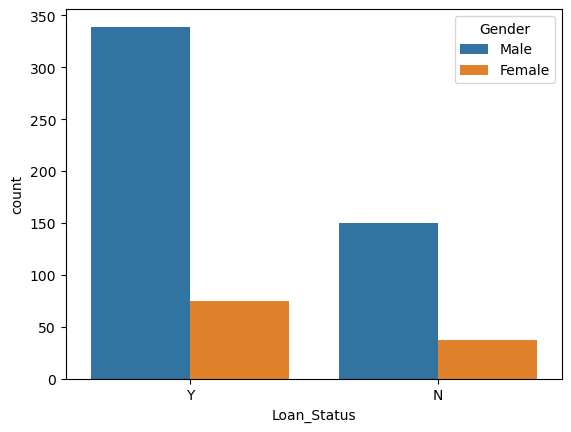

In [63]:
sns.countplot(x="Loan_Status", hue="Gender", data=data)
plt.show()

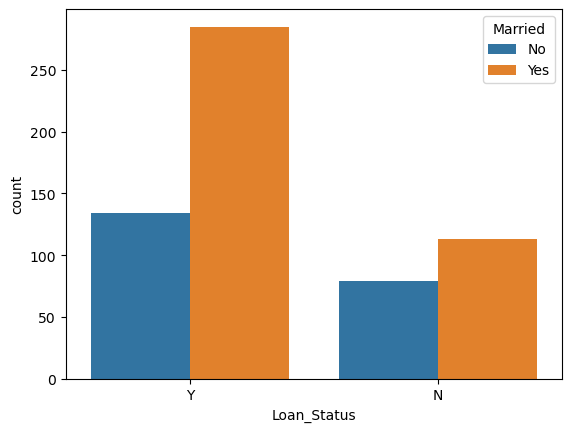

In [64]:
sns.countplot(x="Loan_Status", hue="Married", data=data)
plt.show()

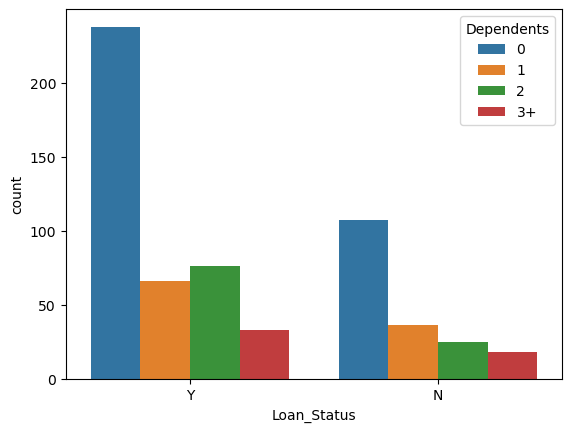

In [65]:
sns.countplot(x="Loan_Status",hue="Dependents",data=data)
plt.show()

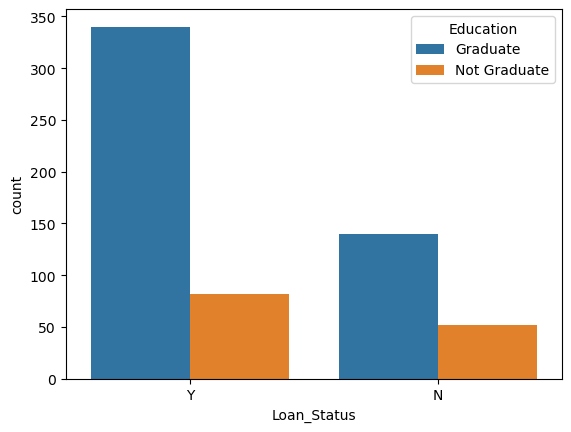

In [66]:
sns.countplot(x="Loan_Status",hue="Education",data=data)
plt.show()

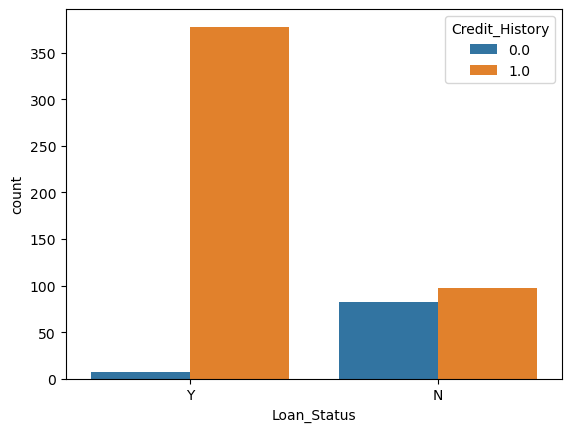

In [67]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=data)
plt.show()

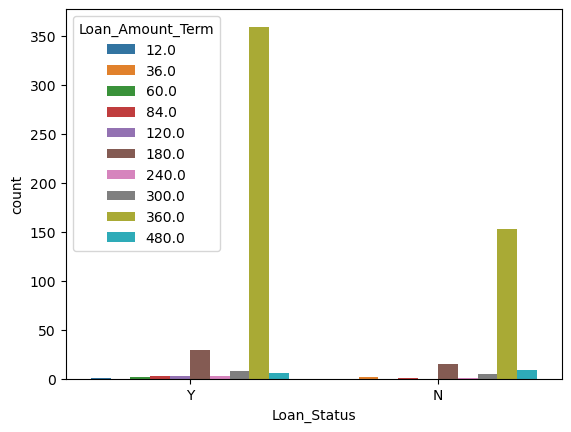

In [68]:
sns.countplot(x="Loan_Status", hue="Loan_Amount_Term", data=data)
plt.show()

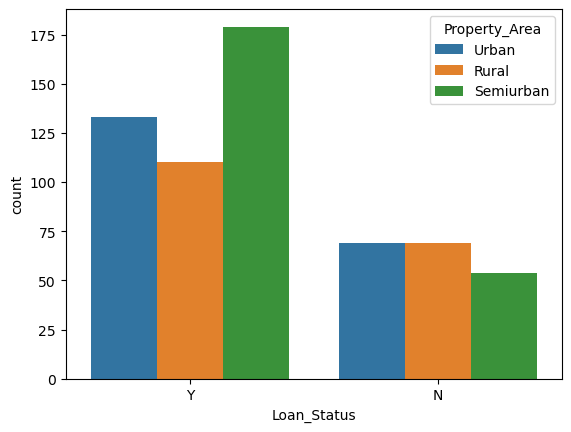

In [69]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=data)
plt.show()

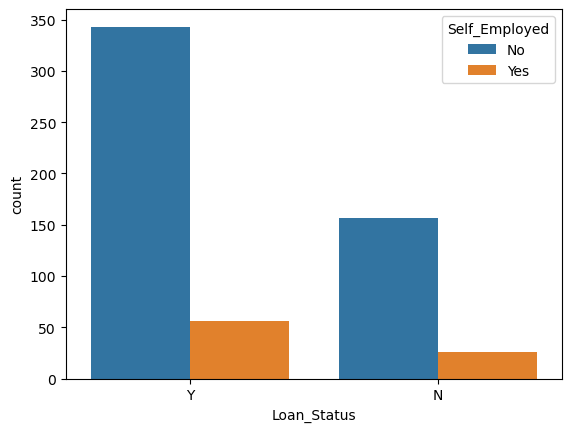

In [70]:
sns.countplot(hue="Self_Employed",x="Loan_Status",data=data)
plt.show()

### Numerical attribute w.r.t loan_status

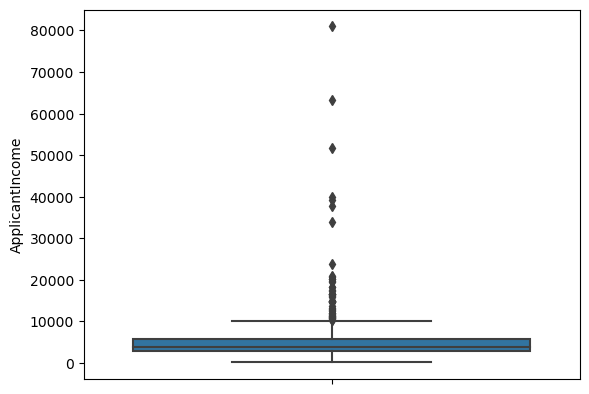

In [71]:
sns.boxplot(y="ApplicantIncome", data=data)
plt.show()

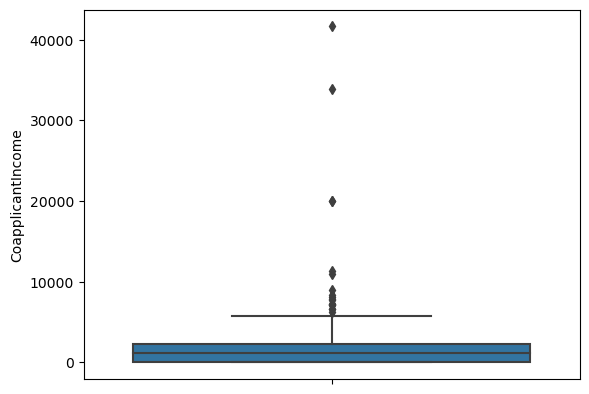

In [72]:
sns.boxplot(y="CoapplicantIncome", data=data)
plt.show()

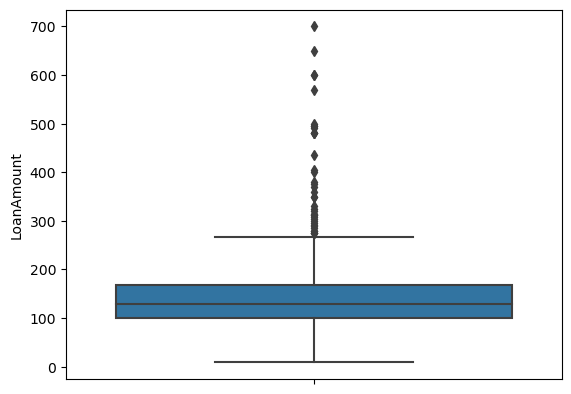

In [73]:
sns.boxplot(y="LoanAmount", data=data)
plt.show()

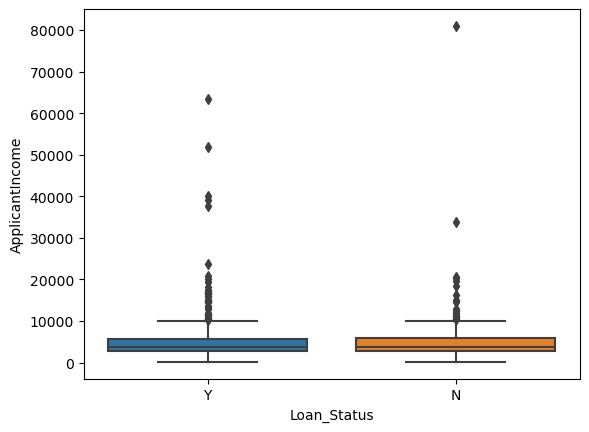

In [74]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data)
plt.show()

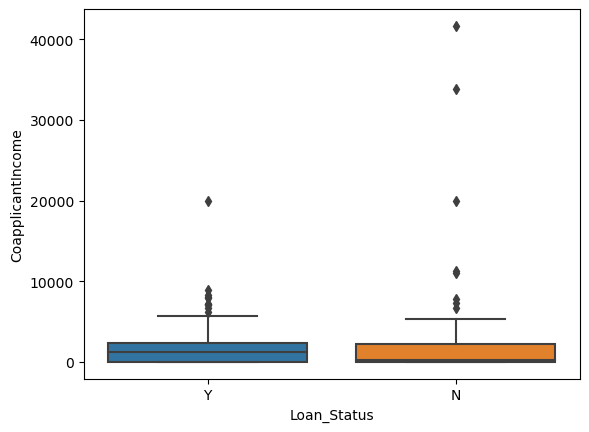

In [75]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=data)
plt.show()

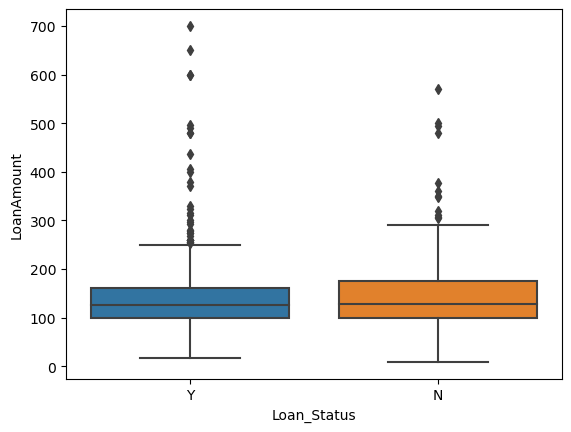

In [76]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=data)
plt.show()

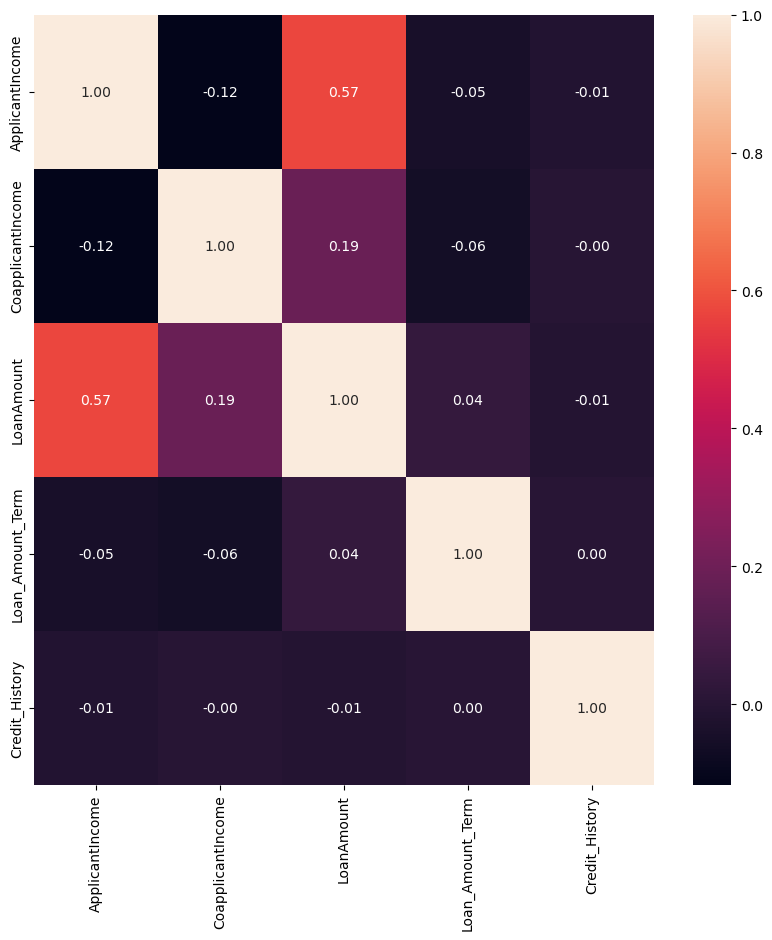

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt="0.2f")
plt.show()

In [78]:
#sns.pairplot(data,hue="Loan_Status")

### Normally distributed or not?

In [79]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

##### The above shows that data is skewed

In [80]:
print(np.mean(data["ApplicantIncome"]))
print(np.median(data["ApplicantIncome"]))
print(stats.mode(data["ApplicantIncome"])[0])

5403.459283387622
3812.5
[2500]


##### Mean ,median,mode are not equal-> so not normally distributed

In [81]:
print(np.mean(data["CoapplicantIncome"]))
print(np.median(data["CoapplicantIncome"]))
print(stats.mode(data["CoapplicantIncome"])[0])

1621.2457980271008
1188.5
[0.]


In [82]:
print(np.mean(data["LoanAmount"]))
print(np.median(data["LoanAmount"]))
print(stats.mode(data["LoanAmount"])[0])

146.41216216216216
nan
[nan]


In [83]:
print(np.std(data["ApplicantIncome"]))
print(np.std(data["CoapplicantIncome"]))
print(np.std(data["LoanAmount"]))

6104.064856533888
2923.8644597700627
85.51500809120331


In [84]:
fig=px.histogram(data["ApplicantIncome"],x="ApplicantIncome",y="ApplicantIncome")
fig.update_layout(title="ApplicantIncome")
fig.show()

fig=px.histogram(data["CoapplicantIncome"],x="CoapplicantIncome",y="CoapplicantIncome")
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig=px.histogram(data['LoanAmount'],x='LoanAmount',y='LoanAmount')
fig.update_layout(title='LoanAmount')
fig.show()

### Missing values

In [85]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)


data["Dependents"]=data["Dependents"].replace('3+',int(3))
data["Dependents"]=data["Dependents"].replace('1',int(1))
data["Dependents"]=data["Dependents"].replace('2',int(2))
data["Dependents"]=data["Dependents"].replace('0',int(0))

In [86]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [87]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [88]:
data["Gender"]=le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])


In [89]:
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [90]:
data["CoapplicantIncome"].min()

0.0

In [91]:
### Data Transformation
data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
data["LoanAmount"] = np.log(data["LoanAmount"])
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]

In [92]:
print(np.mean(data["ApplicantIncome"]))
print(np.median(data["ApplicantIncome"]))
print(stats.mode(data["ApplicantIncome"])[0])

8.341213093227006
8.246040412315828
[7.82404601]


In [93]:
print(np.mean(data["LoanAmount"]))
print(np.median(data["LoanAmount"]))
print(stats.mode(data["LoanAmount"])[0])

4.857250194811088
4.852030263919617
[4.85203026]


In [94]:
print(np.mean(data["CoapplicantIncome"]))
print(np.median(data["CoapplicantIncome"]))
print(stats.mode(data["CoapplicantIncome"])[0])

4.289733227820409
7.080283635438671
[0.]


In [95]:
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome   -0.172951
LoanAmount          -0.195355
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [96]:
fig=px.histogram(data["ApplicantIncome"],x="ApplicantIncome",y="ApplicantIncome")
fig.update_layout(title="ApplicantIncome")
fig.show()

fig=px.histogram(data["CoapplicantIncome"],x="CoapplicantIncome",y="CoapplicantIncome")
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig=px.histogram(data['LoanAmount'],x='LoanAmount',y='LoanAmount')
fig.update_layout(title='LoanAmount')
fig.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

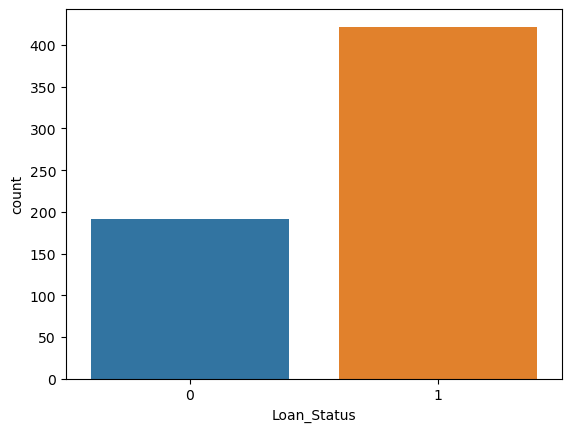

In [97]:
sns.countplot(x="Loan_Status",data=data)

In [98]:
data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### The dataset is imbalanced

In [99]:
#To keep original data as it is to use the same for later.
new_data = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 1    192
0    192
Name: Loan_Status, dtype: int64
Upsampled data:->
 1    422
0    422
Name: Loan_Status, dtype: int64


In [101]:
X=df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y=df_downsampled["Loan_Status"]

In [102]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
##### All the models

### Approach 4

In [ ]:
X=df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y=df_upsampled["Loan_Status"]

In [ ]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
### All the models

In [ ]:
### Approach 5 -> Standardization+downsampled

In [ ]:
### All the Models

In [ ]:
#### Approach 6-> Standardization+upsampled

In [ ]:
### All the Models

In [ ]:
### Approach 7-> Standardization->df